<H1> Interaction network </H1>
<p> This code has the intention to generate an interaction network given a PDB id as an input </p>

In [173]:
import DatabaseConnection as db
import pandas as pd
import networkx as nx

pdb_id = "1a6w"

sql = f"""SELECT *
FROM epitope_analyzer.PDB_Interactions
WHERE PDB_1 = '{pdb_id}'
AND Amino_Name_1 != 'HOH' and Amino_Name_2 != 'HOH'"""
data, titles = db.getDataFromAQuerry_descrip(sql)
p_data = pd.DataFrame( data, columns=titles)
p_data


,PDB_1,PDB_2,Chain_1,Chain_2,Atom_Name_1,Atom_Name_2,Amino_Name_1,Amino_Name_2,Amino_Num_1,Amino_Num_2,Distance,Type_of_Interaction


In [162]:
def calculate_weight(distance, type_int):
    score = 0
    if type_int == "Hydro-Bond":
        score +=4
    elif type_int == "Van-der-Waals":
        score +=1
    #return round(score - 2,2)
    score = 10*(score/distance)
    return round(score,2)

In [163]:
#assambly graph dataset from db
graph_data = []
for d in data:
    edge = (f"{d[2]}_{d[6]}_{d[8]}",f"{d[3]}_{d[7]}_{d[9]}",calculate_weight(d[10],d[11]))
    graph_data.append(edge)
graph_data


[('A_ASP_103', 'H_ASN_101', 2.55),
 ('A_ASP_103', 'H_SER_31', 2.97),
 ('A_ASP_103', 'H_ASN_101', 2.63),
 ('A_ASP_103', 'H_ASN_101', 10.23),
 ('A_ASP_103', 'H_SER_31', 3.37),
 ('A_ASP_103', 'H_ASN_101', 2.75),
 ('A_GLY_117', 'L_GLU_93', 2.76),
 ('A_GLY_117', 'L_TYR_94', 2.6),
 ('A_ASP_119', 'L_ASN_92', 2.67),
 ('A_GLY_117', 'L_TYR_94', 2.52),
 ('A_THR_118', 'L_ASN_92', 2.85),
 ('A_ASP_119', 'L_ASN_92', 2.53),
 ('A_ASP_119', 'L_ASN_92', 10.28),
 ('A_GLY_117', 'L_GLU_93', 3.04),
 ('A_GLY_117', 'L_TYR_94', 2.7),
 ('A_ASP_119', 'L_ASN_92', 11.63),
 ('A_GLY_117', 'L_TYR_94', 14.39),
 ('A_THR_118', 'L_ASN_92', 3.24),
 ('A_ASP_119', 'L_ASN_92', 2.54)]

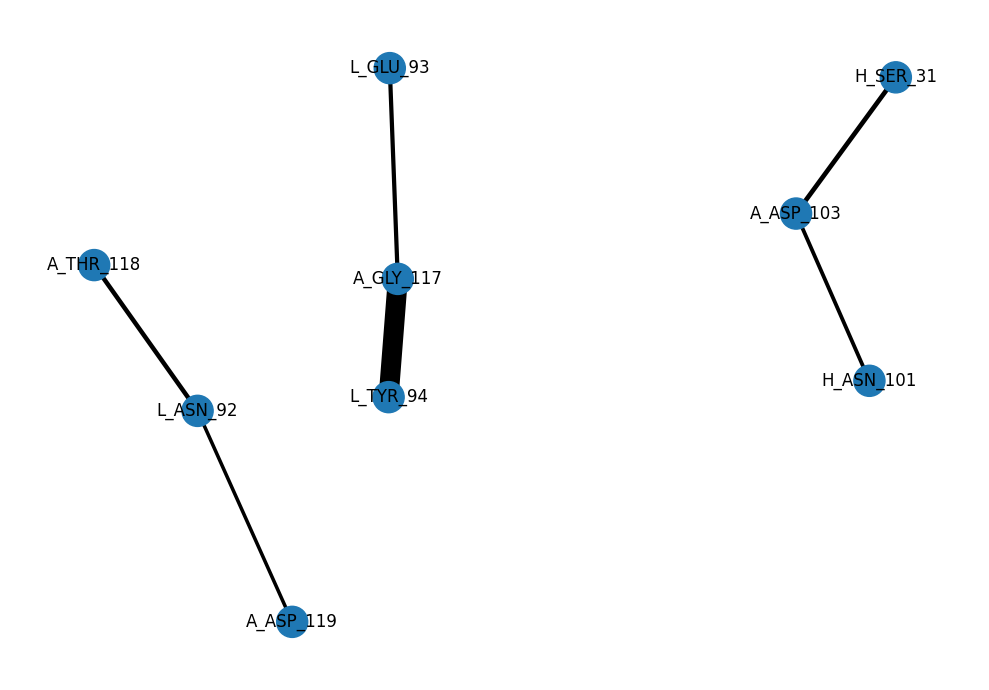

In [164]:
#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt

G = nx.Graph()
G.add_weighted_edges_from(graph_data)

node_size = [G.degree(v)+500 for v in G]
edge_width = [G[u][v]["weight"] for u, v in G.edges()]

pos = nx.spring_layout(G, k=1, scale=2 )
#pos = nx.shell_layout(G)

plt.figure(figsize=(10,7))
#fig, ax1 = plt.subplots()
#nx.draw(G,ax=ax1, with_labels=True)
nx.draw_networkx(G, with_labels=True, node_size=node_size, width = edge_width, pos=pos )
#plt.draw()
plt.axis('off')
plt.tight_layout();

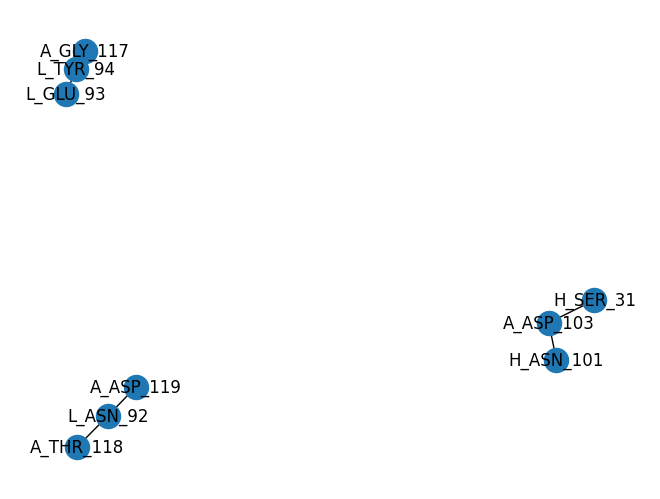

In [165]:
%matplotlib inline

g = nx.Graph()
for dg in graph_data:
    g.add_edge(dg[0], dg[1], w=dg[2])

nx.draw(g, with_labels=True)

<H2> Some statistics to describe the interction network </H2>

In [166]:
#The degree centrality values are normalized by dividing by the maximum possible
# degree in a simple graph n-1 where n is the number of nodes in G.
nx.degree_centrality(G)

{'A_ASP_103': 0.25,
 'H_ASN_101': 0.125,
 'H_SER_31': 0.125,
 'A_GLY_117': 0.25,
 'L_GLU_93': 0.125,
 'L_TYR_94': 0.125,
 'A_ASP_119': 0.125,
 'L_ASN_92': 0.25,
 'A_THR_118': 0.125}

In [167]:
#Compute closeness centrality for nodes.
#Closeness centrality [1] of a node u is the reciprocal of the average shortest
# path distance to u over all n-1 reachable nodes.

#pg. 201 of Wasserman, S. and Faust, K., Social Network Analysis: Methods and Applications, 1994, Cambridge University Press.

nx.closeness_centrality(G)

{'A_ASP_103': 0.25,
 'H_ASN_101': 0.16666666666666666,
 'H_SER_31': 0.16666666666666666,
 'A_GLY_117': 0.25,
 'L_GLU_93': 0.16666666666666666,
 'L_TYR_94': 0.16666666666666666,
 'A_ASP_119': 0.16666666666666666,
 'L_ASN_92': 0.25,
 'A_THR_118': 0.16666666666666666}

In [168]:
#Calculate dispersion between u and v in G.
nx.dispersion(G)

{'A_ASP_103': {'H_ASN_101': 0.0, 'H_SER_31': 0.0},
 'H_ASN_101': {'A_ASP_103': 0.0},
 'H_SER_31': {'A_ASP_103': 0.0},
 'A_GLY_117': {'L_GLU_93': 0.0, 'L_TYR_94': 0.0},
 'L_GLU_93': {'A_GLY_117': 0.0},
 'L_TYR_94': {'A_GLY_117': 0.0},
 'A_ASP_119': {'L_ASN_92': 0.0},
 'L_ASN_92': {'A_ASP_119': 0.0, 'A_THR_118': 0.0},
 'A_THR_118': {'L_ASN_92': 0.0}}

In [169]:
# Select a list of influential nodes in a graph using VoteRank algorithm
nx.voterank(G)

['A_ASP_103', 'A_GLY_117', 'L_ASN_92']

/tmp/ipykernel_966113/3521614418.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  g_adj =nx.adjacency_matrix(G)


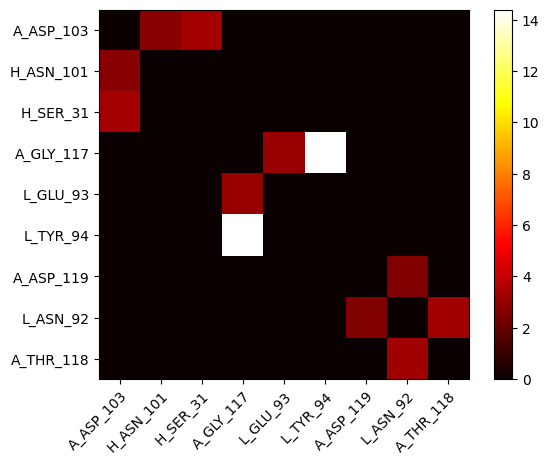

In [170]:
%matplotlib inline
g_adj =nx.adjacency_matrix(G)
#g_adj.todense()
fig, ax = plt.subplots()
plt.imshow(g_adj.todense(), cmap='hot', interpolation='nearest')
plt.colorbar()
nodes = list(G.nodes())
ax.set_xticks(range(len(nodes)), labels=nodes)
#ax.set_xticklabels(nodes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_yticks(range(len(nodes)), labels=nodes)


In [171]:
G.nodes()

NodeView(('A_ASP_103', 'H_ASN_101', 'H_SER_31', 'A_GLY_117', 'L_GLU_93', 'L_TYR_94', 'A_ASP_119', 'L_ASN_92', 'A_THR_118'))

In [172]:
!pip show matplotlib

Name: matplotlib
Version: 3.6.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/dante/PycharmProjects/AAdatabase/venv/lib/python3.10/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 
